# Lab 10: Notebooks, finite differences, an image compression tutorial.

Due: Tuesday, April 26, 2022

Summary: Introduction to Jupyter notebooks. Simple image compression. interactive plotting.

Points: 10

## Task 1: Getting started (3 points).

Learning objective/task: The goal of this first task is to introduce some basic notebook features.

### (Part a) Running python code from this notebook

In [1]:
# import some key packages

import numpy as np
import matplotlib.pyplot as plt

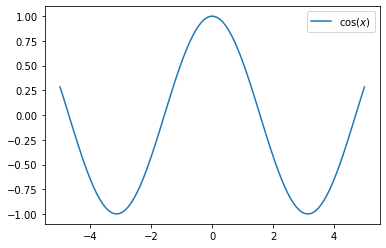

In [2]:
# This cell is python code. Run by clicking the "run cell" play button located on the toolbar.
#
# Running the code from the notebook is EQUIVALENT to running it from spyder or ipython. 
# The result should be familiar

x = np.linspace(-5.0, 5.0, 100)
y = np.cos(x)
plt.plot(x,y,label=r'$\cos(x)$')
plt.legend()
plt.show()

In [3]:
# Another way to run a cell is to hold "Ctrl" and hit enter. Try this here

print(y) # all the values in the array y

[ 0.28366219  0.1855199   0.08548635 -0.01541867 -0.11616651 -0.21573011
 -0.31309448 -0.40726704 -0.49728777 -0.58223897 -0.66125462 -0.73352918
 -0.79832588 -0.85498416 -0.90292641 -0.94166389 -0.97080171 -0.99004282
 -0.99919106 -0.99815319 -0.98693977 -0.96566512 -0.93454613 -0.89390004
 -0.84414119 -0.78577686 -0.71940203 -0.64569335 -0.56540224 -0.47934721
 -0.38840553 -0.29350431 -0.19561099 -0.09572355  0.00513974  0.10595063
  0.20568142  0.30331542  0.39785731  0.48834329  0.57385093  0.65350851
  0.72650399  0.79209322  0.84960756  0.89846069  0.93815458  0.96828458
  0.98854352  0.99872489  0.99872489  0.98854352  0.96828458  0.93815458
  0.89846069  0.84960756  0.79209322  0.72650399  0.65350851  0.57385093
  0.48834329  0.39785731  0.30331542  0.20568142  0.10595063  0.00513974
 -0.09572355 -0.19561099 -0.29350431 -0.38840553 -0.47934721 -0.56540224
 -0.64569335 -0.71940203 -0.78577686 -0.84414119 -0.89390004 -0.93454613
 -0.96566512 -0.98693977 -0.99815319 -0.99919106 -0

In [4]:
# Notice that the variable y was used ("print(y)") in a cell different from the cell
# that created it.
# 
# This is a general rule: if you execute a cell which defines a variable or function, 
# it will be defined everywhere in the notebook. Unless you delete it of course

del y, x
print(y) # y has been deleted -- no longer defined

NameError: name 'y' is not defined

In [ ]:
# WRITE CODE HERE! 
#
# Now try writing your own python code in this cell. 
#
# Write code to compute y = 2+2, then print the value of y
y = 2+ 2
# Then create a new cell and add the code "print(y)"

In [ ]:
y

### (Part b) Using Markdown cells

Not all cells are the same. This cell that you are currently reading is not code. Its called a "markdown" cell. Markdown is just fancy text. 

Try running this cell and see if the next line does anything (it should not)

z = 1

In [ ]:
# this cell is a code cell. you can check if the above cell statement "z=1" 
# did anything. You should find z is not defined.
print(z)

In [ ]:
# this cell is a code cell. We will do z=1 and print
z=1
print(1)

### Writing equations with Latex

Markdown allows you to do fancy things, like make headings (see the first cell of this lab) or write latex equations:

$$ \exp(x) \approx 1 + \frac{x}{1} + \dots $$

If we had more time in the semester, we would go further into latex. Briefly, latex is a document preperation program designed specificially for documents that require mathematical equations and symbols. Equations and symbols are written using latex commands, and turned into nice-looking equations by the latex program.

The Jupyter notebook has a built-in latex program that can understand latex commands. This means that if you want to write an equation in this notebook, just find the latex commands. Jupyter will do the rest.

For now, lets try something simple: copy my latex expression above (if you double click this box and you will see latex "code" appear) and add "x^2 / 2" as a nice looking fraction where you previously saw dots. How do I write powers you ask? There are numerous online latex tutorials (https://www.sharelatex.com/learn/Mathematical_expressions). 


YOUR LATEX FORMULA SHOULD APPEAR **HERE**:
$$ \exp(x) \approx 1 + \frac{x}{1} + x^2 / 2 $$

## Task 2: How to compress an image with linear algebra (4 points)

Learning objective/task: Simple image compression.
    
Jupyter notebooks are especially useful as tutorials.  In this second task we will walk through the steps of compressing an image using the singular value decomposition.

In linear algebra you may have heard about a special kind of matrix representation called a singular value decomposition (SVD), see https://en.wikipedia.org/wiki/Singular_value_decomposition. If you don't know what this is, you can think of a SVD as an algorithm which identifies the "most important" columns of a matrix. A column is "important" if the other columns of the matrix can be written as a linear combination of the important ones. 

Suppose you have a 10x10 matrix, but you find that all 10 columns can be written as a linear combination of just 2 columns. That would be great -- you could compress the matrix by storing just 2 columns! This is what the SVD does, and how it can  be used to approximate a matrix ${\bf A}$. 

Since an image is really just a matrix, we can use the SVD to compress images. A bit more detail is given at the end of this lab.

Before proceeding, you will need to download the image Einstein.jpg from the class bitbucket page.

### Running the image compression code 

In [ ]:
! pip3 install imageio

In [ ]:
# Lets import the packages we need: numpy, imread, and matplotlib
import numpy as np
from matplotlib import pyplot as plt

# imread was recently moved out out scipy into the imageio package
# which imread function you import depends on your version of scipy
# from scipy.misc import imread
from imageio import imread

In [ ]:
## Load image and average its rgb pixels to get gray scale
PicMatColor = imread("mountains.jpg")
PicMatGray = np.sum(PicMatColor,2)/3

In [ ]:
# convince yourself that PicMatGray is just an ordinary matrix
print(PicMatGray.shape) # theres 599 rows and 456 colums
print(PicMatGray)

In [ ]:
## Compute the SVD
Umat, Wvec, Vmat = np.linalg.svd(PicMatGray)

In [ ]:
## the variables Umat, Wvec, Vmat are numpy arrays. You should look at their shape
## the shape tells us the size of the vector (if its a vector) 
## or the number of rows and columns (if its a matrix)

print(Umat.shape)
print(Wvec.shape)
print(Vmat.shape)

In [ ]:
## plot singular value spectrum 
## larger singular values have a 1-1 correspondence with "important columns"
##
## The smaller the singular value, the less important the corresponding column
fig2 = plt.figure()
plt.semilogy(range(len(Wvec)),Wvec[:],'r*')
plt.xlabel("Singular Value Number")
plt.ylabel("Singular value")
plt.title("Singular value spectrum of Einstein")
plt.show()

In [ ]:
# Show the image using the 
# (i) the most important columns, 
# (ii) the first 2 most important columns, and 
# (iii) the first 5 most important columns
fig = plt.figure()
count = 1
for k in [1,2,5]:
    
    #  setup a subplot
    ax = fig.add_subplot(2,3,count)
    ax.set_title("SVD with n="+str(k))
    
    # picMatC is the image approximated with k columns 
    PicMatC = np.dot(np.dot(Umat[:,0:k],np.diag(Wvec[0:k])),Vmat[0:k,:])
    
    # show the picture
    ax.imshow(PicMatC,cmap=plt.cm.gray)
    count += 1
plt.show()

In [ ]:
# lets add more columns 
fig = plt.figure()
count = 1
for k in [10,20,50]:
    
    #  setup a subplot
    ax = fig.add_subplot(2,3,count)
    ax.set_title("SVD with n="+str(k))
    
    # picMatC is the image approximated with k columns 
    PicMatC = np.dot(np.dot(Umat[:,0:k],np.diag(Wvec[0:k])),Vmat[0:k,:])
    
    # show the picture
    ax.imshow(PicMatC,cmap=plt.cm.gray)
    count += 1
plt.show()

### Use your own figure

Use another jpeg (jpg is the extension) image that you already have either on your computer or something on the internet. 

repeat this image compression experiment by (i) moving the image to the same folder as the Jupyter notebook (ii) changing the "Einstein.jpg" to your figure's name, and finally (iii) running all of the cells in the same sequence. 

Some questions that you may wish to ponder (but are not required for completing the lab): What images are easy to compress? What images are hard to compress? Are certain kinds of patining styles typically easier or harder to compress? Can this be used to classify image types?

### A bit more on image compression

If you interested in knowing more (a complete discussion is outside of the scope of this lab!)...

A grayscale image can be represented by a matrix of integers, where each  pixel in the image is an element in the matrix, and the integer value of the matrix element is an 8-bit color (from black, $2^0-1=0$ to white, 
$2^8-1=255$). Thus, the SVD of an "image matrix'' can be used to compress an image (with loss of quality, of course). 

The approximation algorithm is simple: compute the SVD of the image matrix ${\bf A}$ (the variable PicMatGray above), set all singular values less than some cuttoff value to zero (these correspond to the unimporant columns), and finally build the  approximate matrix, $\hat{\bf A}$, using the nonzero singular values, and the corresponding columns of ${\bf U}$ and ${\bf V}$.

#### For even more information, you may be interested in the following resources:

[Introduction to the singular value decomposition](https://www.youtube.com/watch?v=o4XzVPpcRXE)

[SVD for image compression](https://www.youtube.com/watch?v=xzqpVILA4_c) (blackboard is a bit hard to see, but I found the explanation to be clear)

[SVD for image compression](http://math.arizona.edu/~brio/VIGRE/ThursdayTalk.pdf)


## Task 3: How to animate images (3 points)

Learning objective/task: An interactive Jupyter notebook animation

This part will leverage [the widget addons](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

## Part a (How to make your plots interactive)

Write a function that takes input and makes a plot. Use Jupyter widgits to animate that function

In [6]:
def car_plot(time):
    """ Plot the car's distance traveled (D = Rate x time)
    
    Input: the time as a number 
    
    Output: None. The function makes a plot but doesn't return anything
    """
    
    speed = 2.0
    D     = speed * time

    # plot w, z, and wz
    plt.plot(0,0,'ro',label="Start")
    plt.plot(D,0,'k*',label="T = %f"%time)
    plt.xlim([-1,10])
    plt.legend(loc=2)
    
    plt.show()

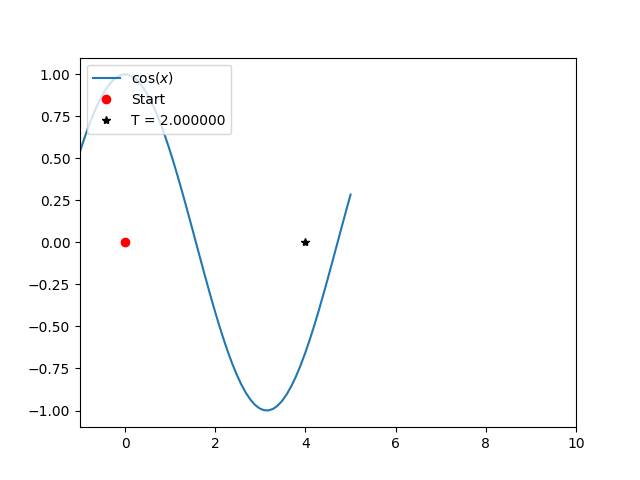

In [7]:
# This is just a normal python function, which makes a plot 
car_plot(2.0)

In [8]:
# lets annimate it with a scroll bar.
# First, load notebook widgets from the ipywidgets package
from ipywidgets import interactive

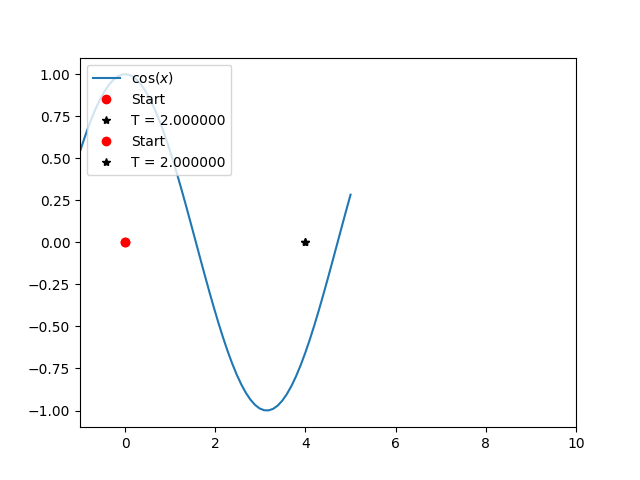

In [9]:
# We use the interact widget, which is a function with the following input:
# a function, and the function's variable input and range 
interactive(car_plot,time=(0,4.0))

### You can turn this into a movie too! But its a bit trickier...


http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

## Part b: Audio-fy your functions

Consider a "chirp signal" for some constant $c$

$$ h(t) = \exp(- t^2) \sin( 2 \pi *c*t) $$

in the range of $[-10,10]$. c is the frequenct of the wave (440 Hz is the musical note A used when tuning: https://en.wikipedia.org/wiki/A440_(pitch_standard)). 

Chirp signals model many phenomena including gravitational waves and other runaway processes


In [ ]:
# this will allow you to "hear" a function
import IPython.display as ipd

In [ ]:
# Example: plot h for c = 440 
c = 440

sr = 22050 # sample rate
t = np.linspace(-5, 5, num=int(10*sr)) 

h = np.exp(-t**2) * np.sin(2*np.pi*440*t)
plt.plot(t,h)
#plt.xlim([-.1,.1])

In [ ]:
# Example: what does h sound like it if were a sound wave?
ipd.Audio(h, rate=sr)

# Bonus (for fun) -- interactive plots

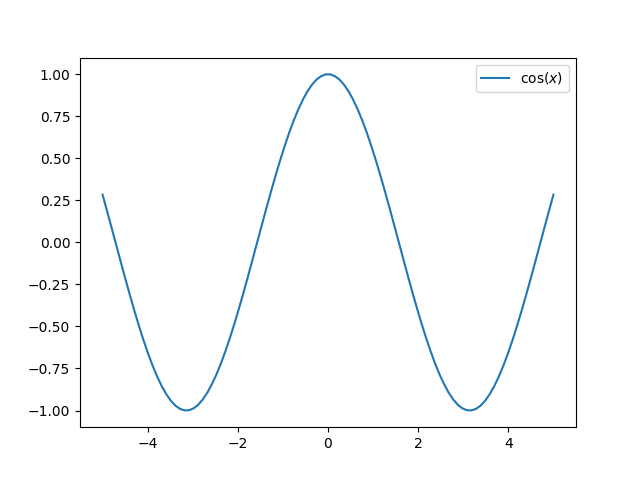

In [10]:
# lets make this plot interactive

# "%matplotlib" is a magic function that changes the behavior of this cell
# if this cell doesn't run, you would need to install ipympl
%matplotlib widget

x = np.linspace(-5.0, 5.0, 100)
y = np.cos(x)
plt.plot(x,y,label=r'$\cos(x)$')
plt.legend()
plt.show()

## Upload your work to git

Congratulations! You've completed the lab. Now lets upload your work to git.

1) Open the terminal and change into your git project folder MTH280-2022-YourName.

2) Create a new directory to place your work

```
>>> mkdir lab10
```

3) Move this entire Lab 10 notebook into the new lab11 directory

4) Make git aware of these new files by doing

```
>>> ls     # COMMENT: make sure you see "lab10" in the folder
>>> git add lab10
```

5) Commit the files to the git project and upload to Bitbucket:

```
>>> git commit -m "Lab 10 answers"
>>> git push
```

6) Finally, open the web browser and go to your Bitbucket page. Check the files have been uploaded. 

